<a href="https://colab.research.google.com/github/22ad025/biodata/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
churn=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
churn.shape

(7043, 21)

observation:This shows that the how many rows and columns in this dataset.

In [ ]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


observation:This code shows that the mean,standrad derivation etc. of this dataset

In [ ]:
churn.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

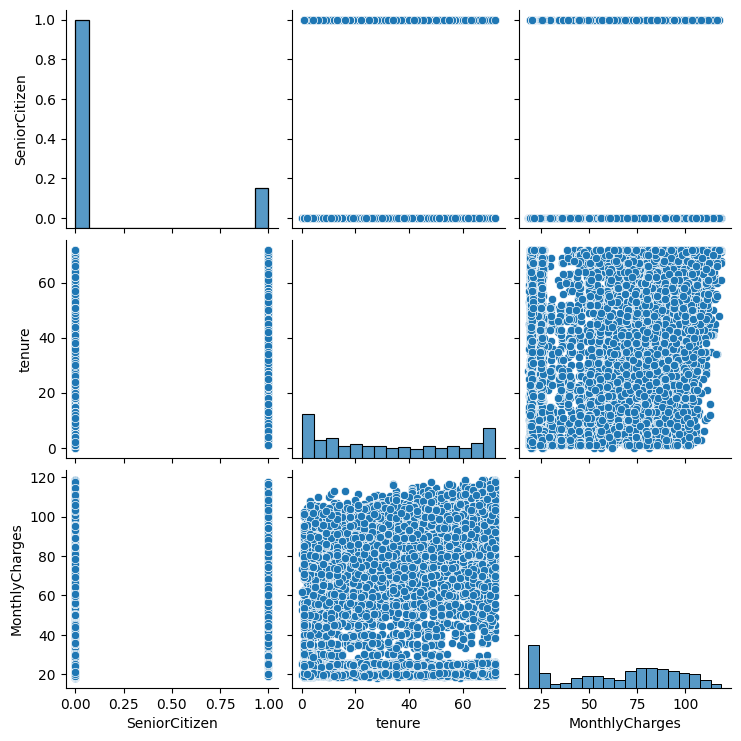

In [ ]:
sns.pairplot(churn)

observation:pair plot depends on the nature of this dataset.Interpretation should involve a combination of statistical analysis, domain knowledge, and a careful examination of the visual patterns in the plot

<Axes: ylabel='Frequency'>

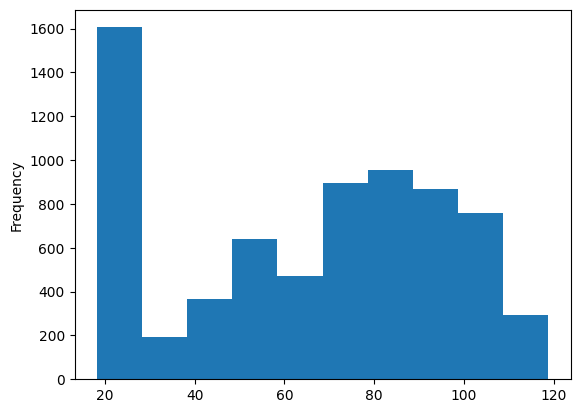

In [ ]:
churn['MonthlyCharges'].plot.hist()

observation:The Histogram shows that insights into the patterns and characteristics of monthly charges in your dataset

<Axes: xlabel='gender', ylabel='Churn'>

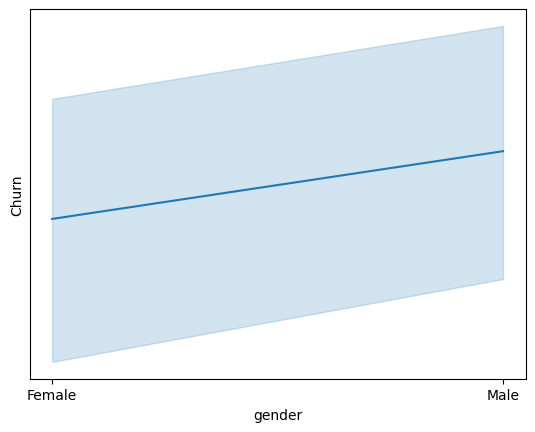

In [ ]:
sns.lineplot(x="gender",y="Churn",data=churn)

observation:The Line plot involves considering the context of your dataset and understanding how the 'gender' variable relates to the likelihood of churn.

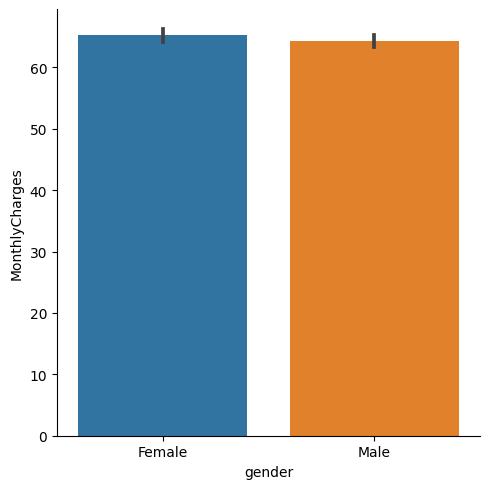

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='gender', y='MonthlyCharges', data=churn, kind='bar')
plt.show()

observation:The bar plot involves considering the context of your dataset and understanding how the 'gender' variable relates to the distribution of monthly charges.

In [ ]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

observation:It will show the count of missing values for each column in the 'churn' DataFrame, allowing you to assess the data quality and plan any necessary data preprocessing steps.

In [ ]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
churn.duplicated().sum()

0

observation:It will show the count of duplicated rows in the 'churn' DataFrame. If the count is greater than zero, you may want to investigate further and decide on an appropriate course of action, such as removing the duplicated rows if they are not intended or addressing the data quality issue that led to duplication.

In [ ]:
churn.size

147903

observation:It will show the total number of elements in the 'churn' DataFrame. This information can be useful for understanding the scale of your dataset, especially when dealing with large datasets where memory considerations become important.

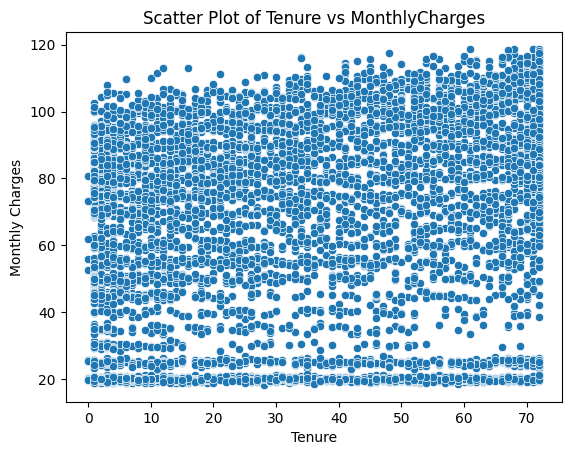

In [ ]:
sns.scatterplot(x='tenure', y='MonthlyCharges', data=churn)
plt.title('Scatter Plot of Tenure vs MonthlyCharges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

observation:The scatter plot involves considering the context of your dataset. It can provide valuable insights into the relationship between customer tenure and monthly charges, helping you understand potential patterns or correlations.

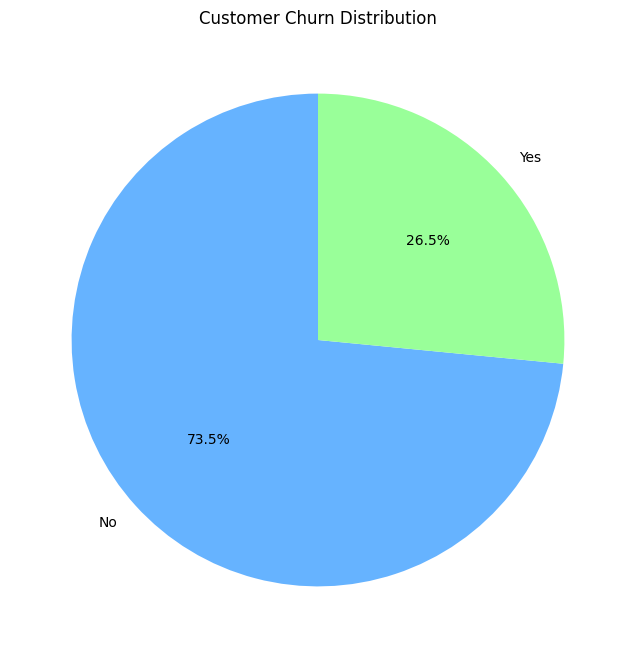

In [ ]:
churn_counts = churn['Churn'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Customer Churn Distribution')
plt.show()


observation:The pie chart involves understanding the distribution of churned and non-churned customers as a percentage of the total customer base. This visualization can be valuable for presenting high-level information about the dataset's churn distribution.

In [ ]:
churn.corr()

<ipython-input-20-9f285b74dfe6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


from matplotlib import pyplot as plt
_df_0['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='SeniorCitizen', y='tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MonthlyCharges']
  ys = series['SeniorCitizen']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('MonthlyCharges', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MonthlyCharges')
_ = plt.ylabel('SeniorCitizen')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MonthlyCharges']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('MonthlyCharges', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MonthlyCharges')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MonthlyCharges']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MonthlyCharges'}, axis=1)
              .sort_values('MonthlyCharges', ascending=True))
  xs = counted['MonthlyCharges']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('MonthlyCharges', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MonthlyCharges')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['SeniorCitizen'].plot(kind='line', figsize=(8, 4), title='SeniorCitizen')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

observation:The correlation matrix involves understanding the relationships between numeric variables in your dataset. The heatmap provides a visual representation of the correlation coefficients, making it easier to identify patterns and correlations.

<ipython-input-21-aed613f55392>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(churn.corr(),annot=True)


<Axes: >

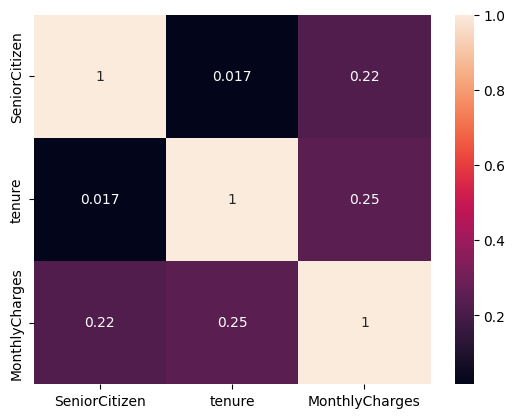

In [ ]:
sns.heatmap(churn.corr(),annot=True)

observation:The heatmap involves visually inspecting the color patterns and numerical annotations to understand the relationships between numeric variables in the 'churn' dataset. It provides a comprehensive overview of the correlation structure and can guide further analysis and modeling decisions.

<Axes: xlabel='gender', ylabel='Churn'>

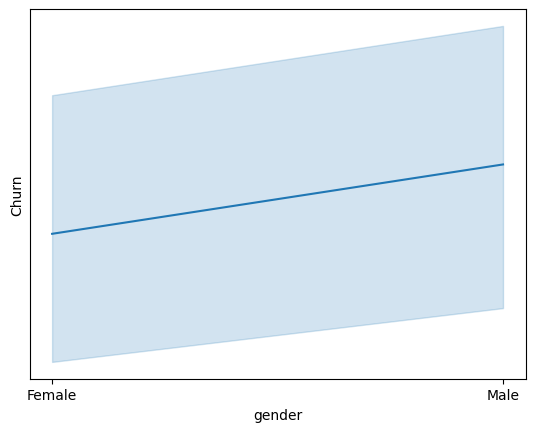

In [ ]:
sns.lineplot(x="gender",y="Churn",data=churn)

observation:The line plot involves considering the context of your dataset and understanding how the 'gender' variable relates to the likelihood of churn. If 'gender' is categorical, you might want to use a bar plot instead for a clearer representation.

<Axes: xlabel='PaymentMethod', ylabel='count'>

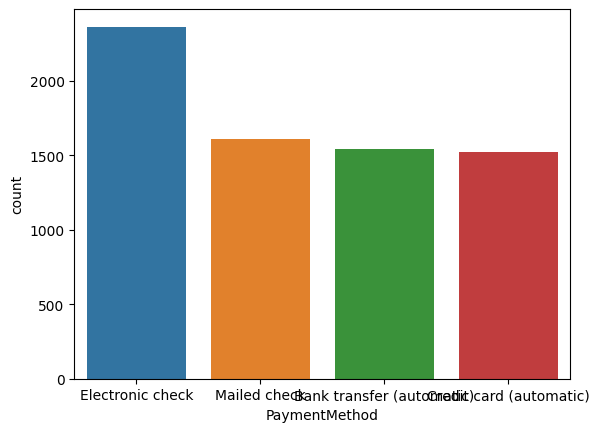

In [ ]:
sns.countplot(x="PaymentMethod",data=churn)

observation:The count plot involves understanding the distribution of payment methods, which can be useful for marketing, customer service, or strategic decision-making. It provides a visual representation of the prevalence of each payment method within the dataset.

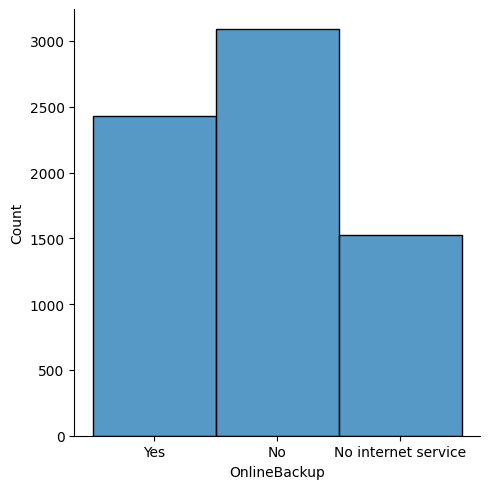

In [ ]:
sns.displot(churn['OnlineBackup'])

observation: The count plot involves understanding how many customers have opted for online backup services and how many have not. This visualization helps in gaining insights into the distribution of the 'OnlineBackup' variable among customers in the dataset.

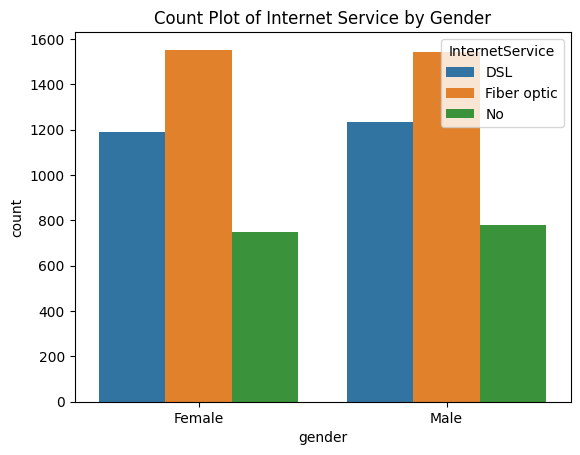

In [ ]:
churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
sns.countplot(x='gender', hue='InternetService', data=churn)
plt.title('Count Plot of Internet Service by Gender')
plt.show()


observation:The count plot involves understanding the distribution of Internet services among male and female customers, providing insights into gender-based preferences within the dataset.

In [ ]:
churn.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No

observation:The mean values for each numerical column in the 'churn' DataFrame. This information is helpful for gaining a high-level understanding of the central tendencies within the dataset.

In [ ]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')
prediction = churn['TotalCharges'].std()
print("Standard Deviation of TotalCharges:", prediction)

Standard Deviation of TotalCharges: 2266.771361883145


observation:The standard deviation of the 'TotalCharges' column after handling errors and converting it to numeric values. This information is useful for understanding the variability in the 'TotalCharges' variable.

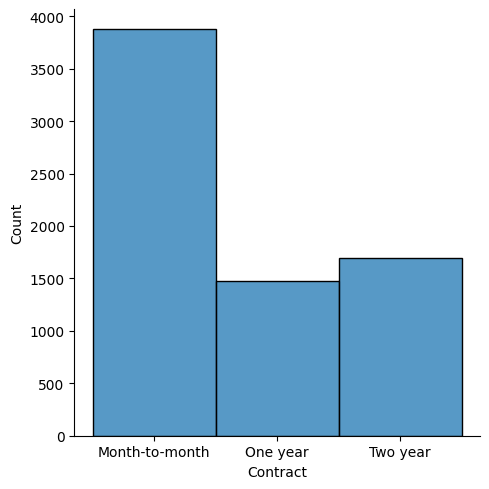

In [ ]:
sns.displot(churn['Contract'])

observation:The count plot involves understanding the distribution of contract types among customers, providing insights into customer preferences within the dataset.

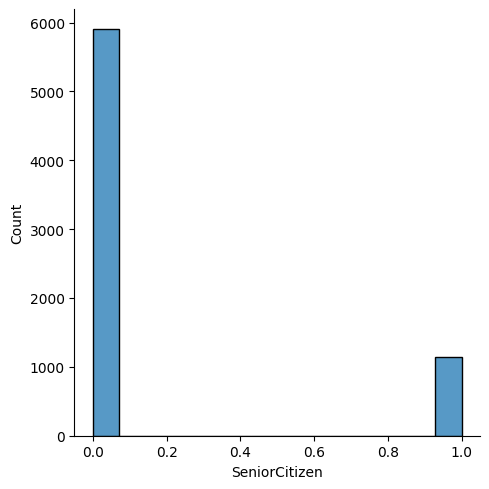

In [ ]:
sns.displot(churn["SeniorCitizen"])

observation:The count plot (or histogram) helps visualize the distribution of senior citizens within the dataset, providing insights into the prevalence of senior citizens among the customers.

In [ ]:
churn.mode()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Male,0.0,No,No,1.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.05,,No
1,0003-MKNFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.2,NaN
2,0004-TLHLJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0011-IGKFF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0013-EXCHZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,9992-RRAMN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,9992-UJOEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,9993-LHIEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


observation:The mode values for each column in the 'churn' DataFrame. Analyzing the mode can provide insights into the most common values in the dataset, which is valuable for understanding the central tendencies of the variables.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [ ]:
churn = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn = churn.dropna()
print(churn)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

In [ ]:
le = LabelEncoder()
for column in churn.select_dtypes(include='object').columns:
    churn[column] = le.fit_transform(churn[column])
X = churn.drop(['Churn'], axis=1)
y = churn['Churn']

observation:This preprocessing step is necessary for many machine learning algorithms that require numerical input. However, it's important to note that label encoding introduces an ordinal relationship between categories, which may not always be appropriate.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

observation:This code sets the stage for training and evaluating a random forest classifier on the given dataset. Further steps would involve making predictions on the test set and evaluating the model's performance using metrics such as accuracy, precision, recall, and the confusion matrix.

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.80

Confusion Matrix:
[[943  93]
 [193 180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



observation:This code calculates and prints various evaluation metrics, including accuracy, confusion matrix, and a detailed classification report. These metrics provide a comprehensive view of the model's performance on the test set.